In [10]:
import slicer, vtk
import numpy as np
from vtk.util import numpy_support 

# Example

In [13]:
slicer.mrmlScene.Clear(False)

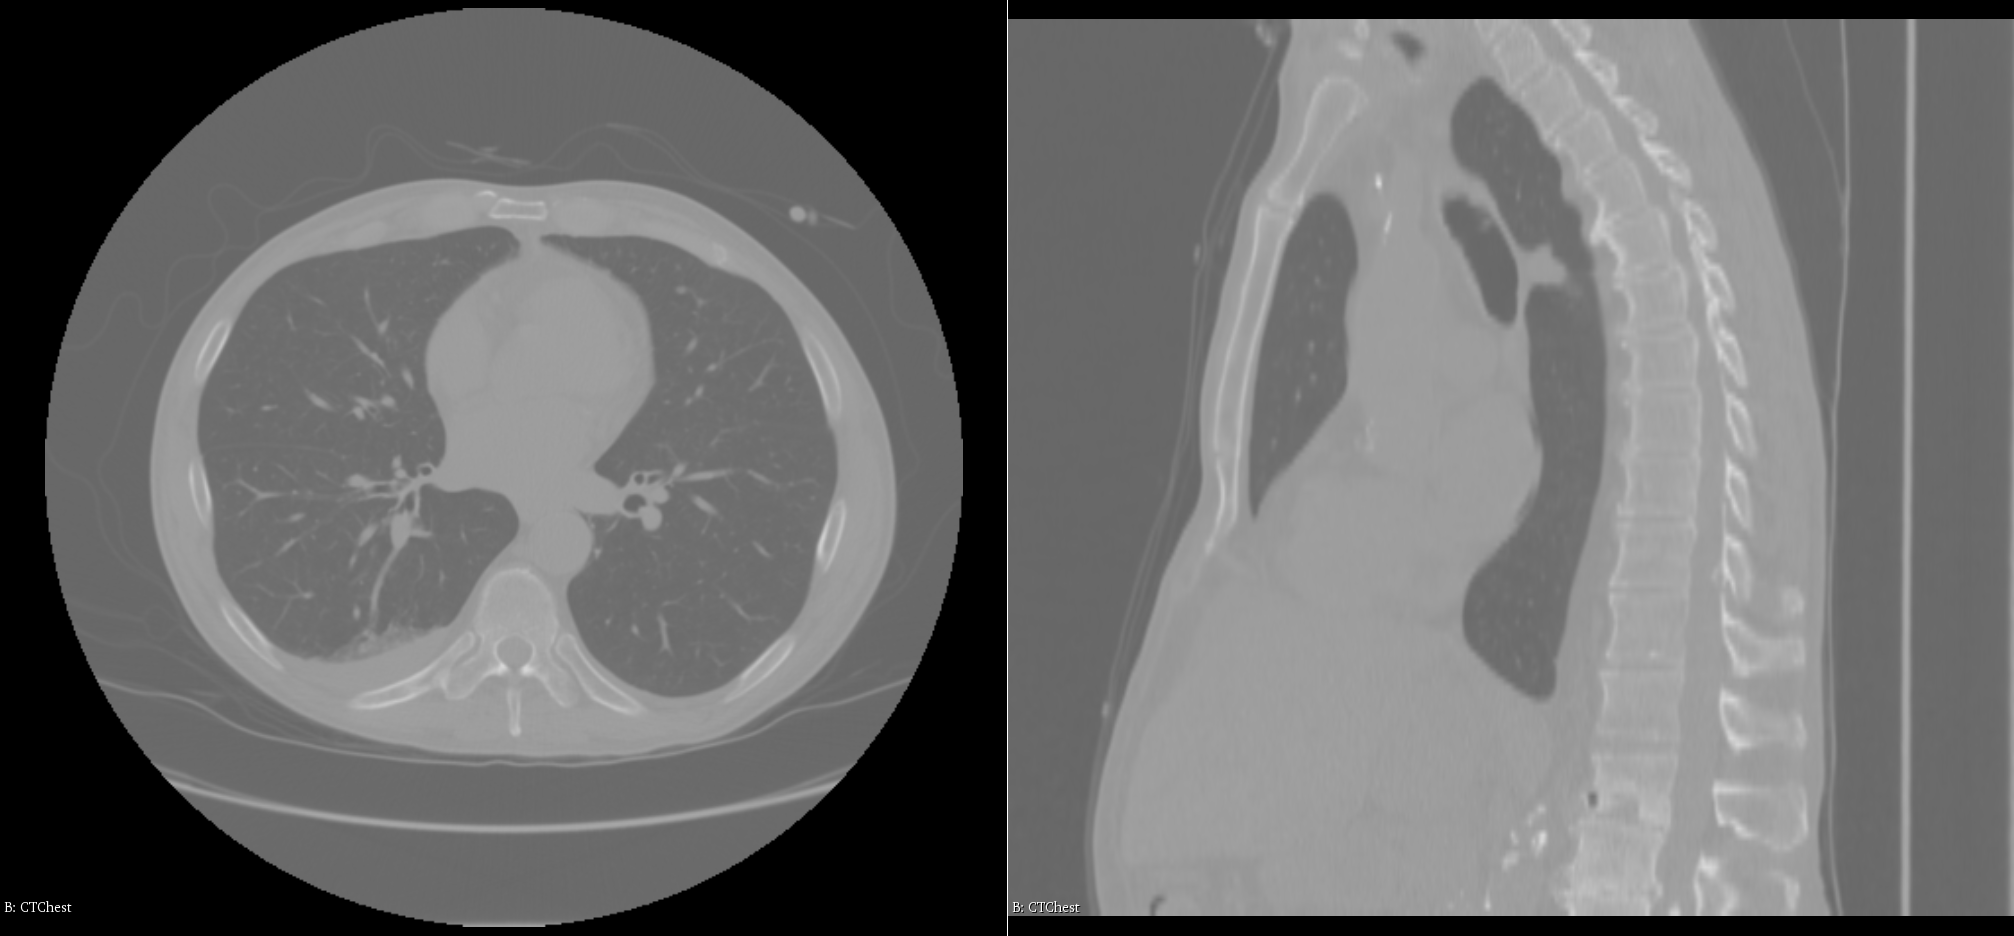

In [27]:
import SampleData
sampleDataLogic = SampleData.SampleDataLogic()
volume = sampleDataLogic.downloadCTChest()
slicer.app.layoutManager().setLayout(slicer.vtkMRMLLayoutNode.SlicerLayoutSideBySideView)
display()

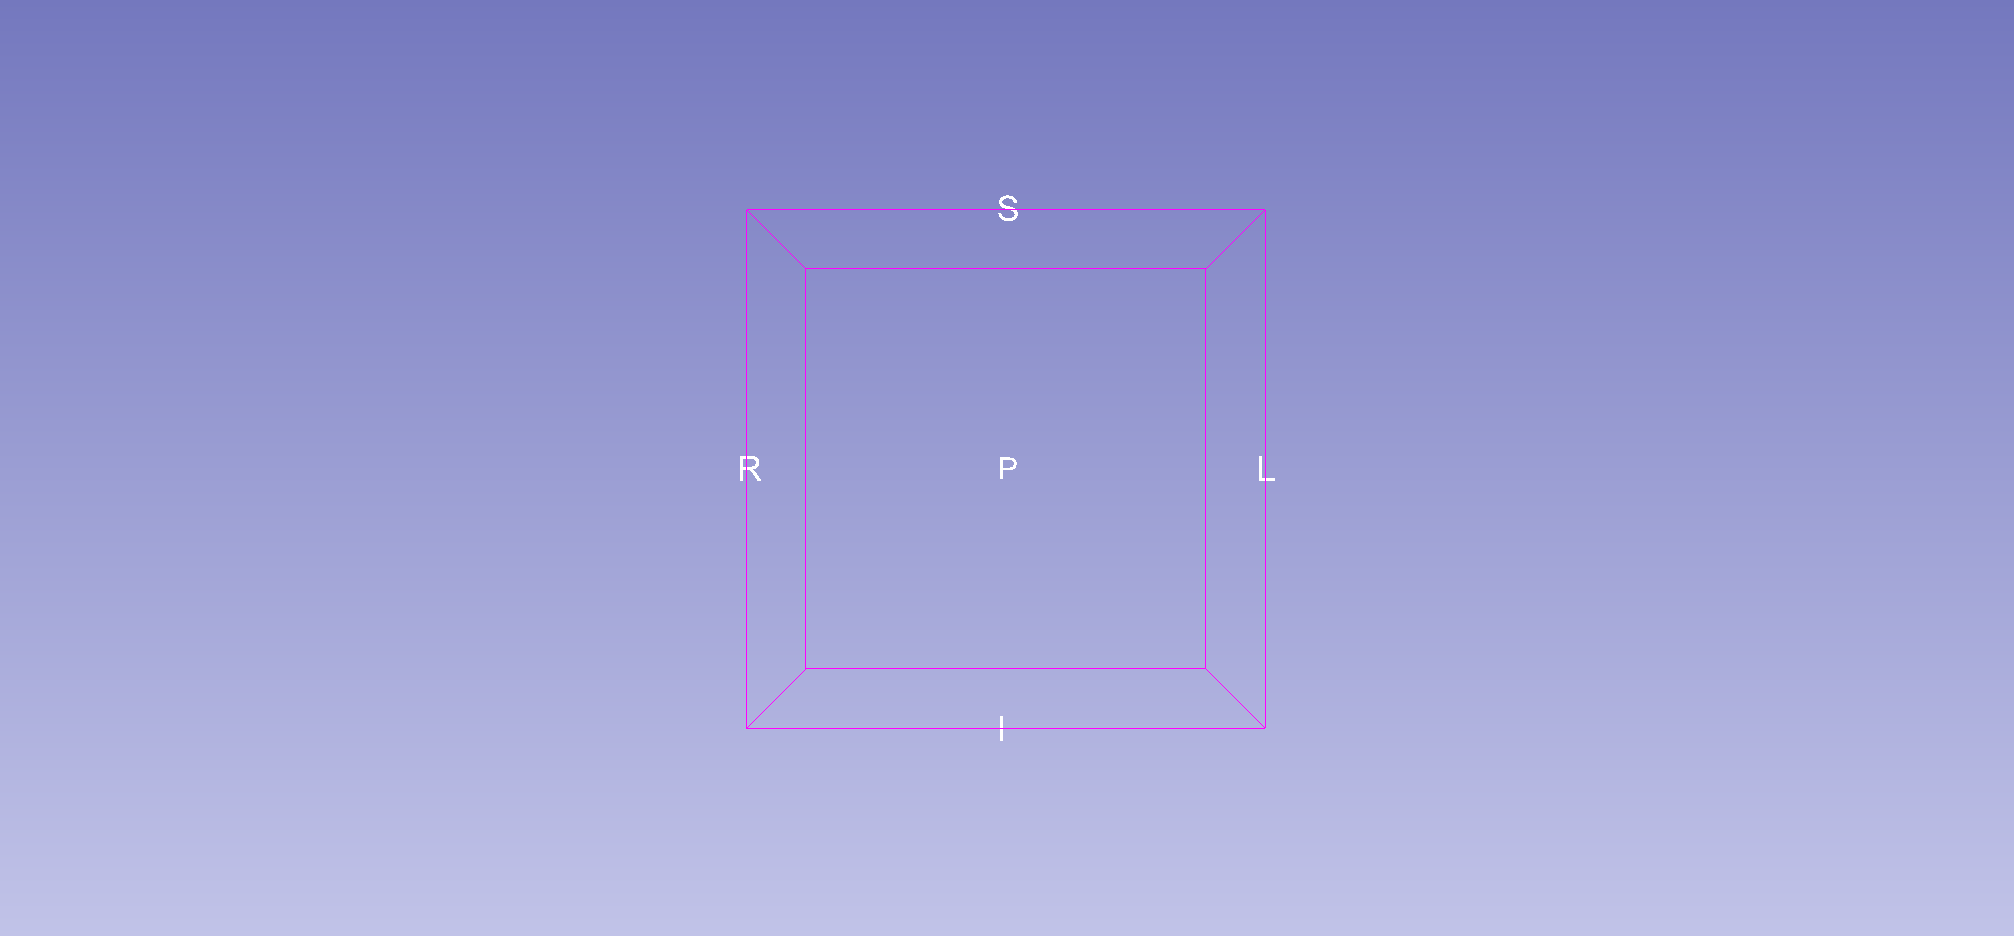

In [28]:
parameters = {}
parameters["InputVolume"] = volume.GetID()
parameters["Threshold"] = 220
outModel = slicer.vtkMRMLModelNode()
slicer.mrmlScene.AddNode( outModel )
parameters["OutputGeometry"] = outModel.GetID()
grayMaker = slicer.modules.grayscalemodelmaker
slicer.cli.runSync(grayMaker, None, parameters)
slicer.app.layoutManager().setLayout(slicer.vtkMRMLLayoutNode.SlicerLayoutOneUp3DView)
slicer.app.layoutManager().threeDWidget(0).threeDView().resetCamera()
display()

# Custom example
## Preparing scalar node

In [64]:
slicer.mrmlScene.Clear(False)

In [65]:
rnd_volume = np.random.rand(100 * 100 * 100).reshape((100,100,100))

scalar_node = slicer.vtkMRMLScalarVolumeNode()
scalar_node.CreateDefaultDisplayNodes()
vtk_image_data = vtk.vtkImageData()

In [66]:
x_dim, y_dim, z_dim = rnd_volume.shape
vtk_image_data.SetDimensions(x_dim, y_dim, z_dim)

vtk_array = numpy_support.numpy_to_vtk(num_array=rnd_volume.ravel(), deep=False, array_type=vtk.VTK_FLOAT)
vtk_image_data.GetPointData().SetScalars(vtk_array)

In [67]:
# Checking values
point_data = vtk_image_data.GetPointData()
print(point_data.GetScalars())

vtkFloatArray (0xbe3fe40)
  Debug: Off
  Modified Time: 8397227
  Reference Count: 2
  Registered Events: (none)
  Name: (none)
  Data type: float
  Size: 1000000
  MaxId: 999999
  NumberOfComponents: 1
  Information: 0
  Name: (none)
  Number Of Components: 1
  Number Of Tuples: 1000000
  Size: 1000000
  MaxId: 999999
  LookupTable: (none)




## Display result

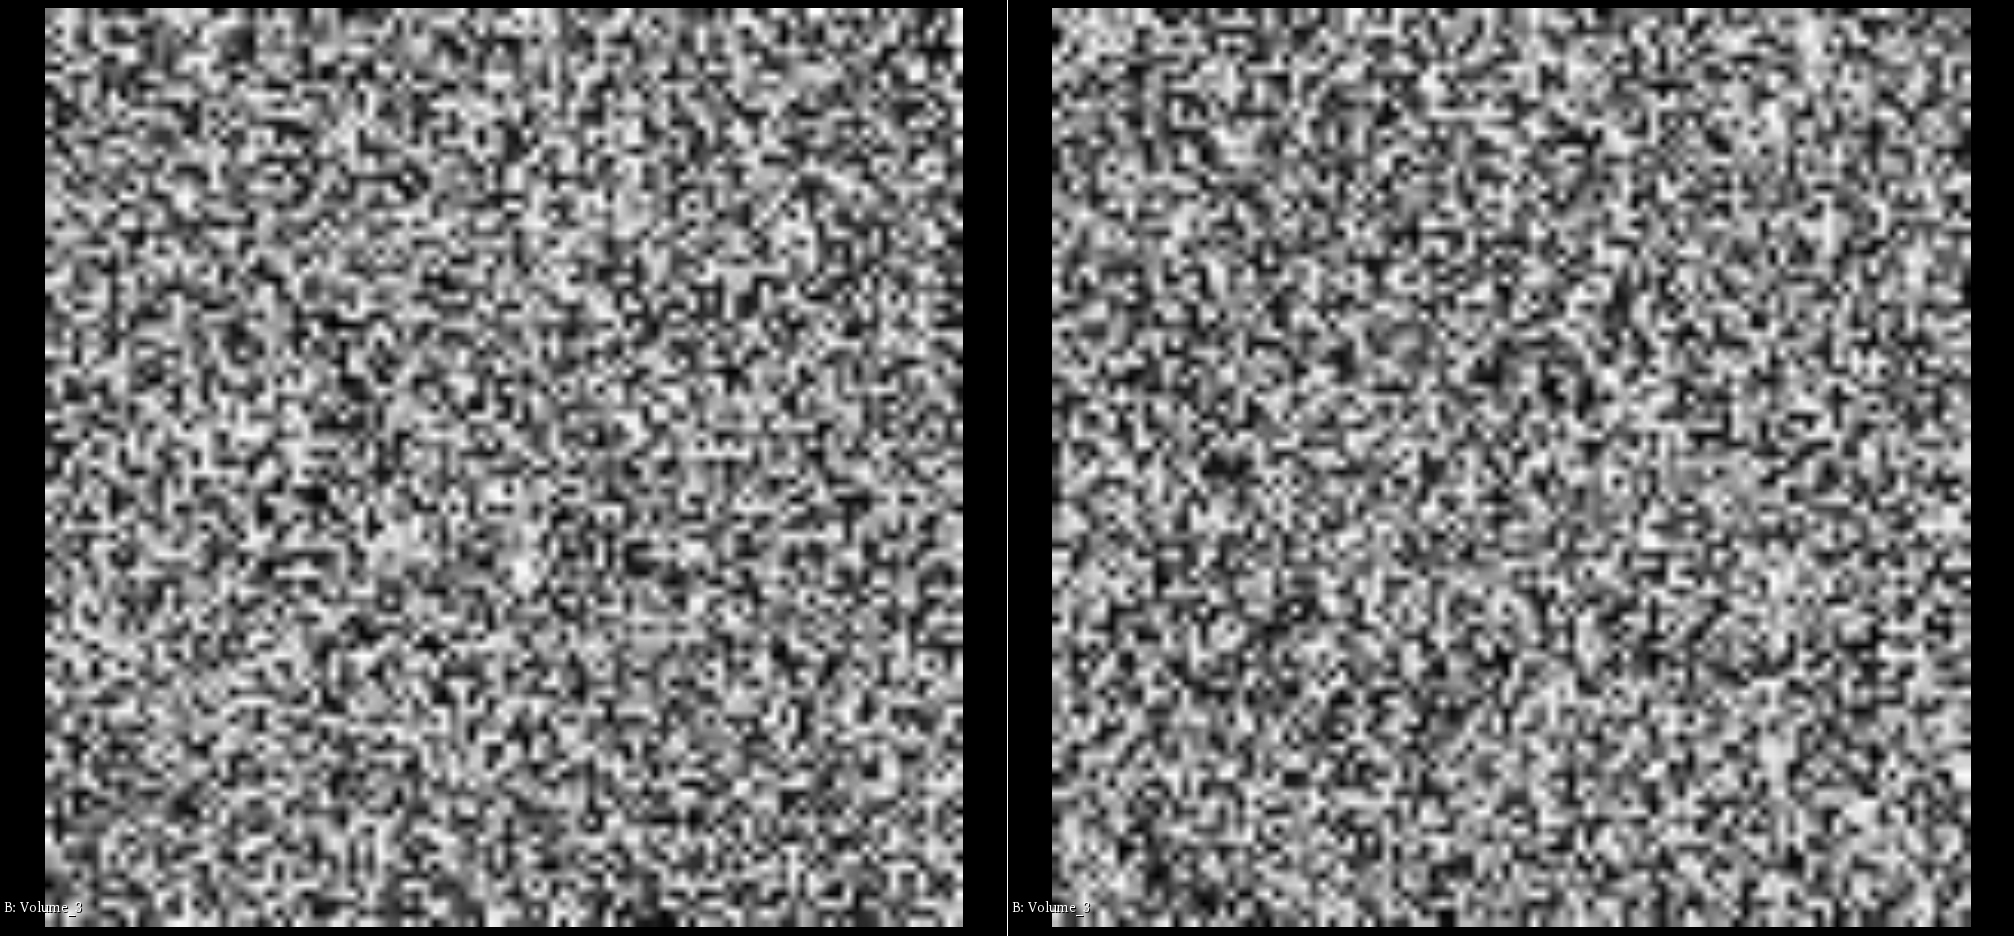

In [68]:
scalar_node.SetAndObserveImageData(vtk_image_data)

slicer.mrmlScene.AddNode( scalar_node )

slicer_layout_manager = slicer.app.layoutManager()
slicer_layout_manager.setLayout(slicer.vtkMRMLLayoutNode.SlicerLayoutSideBySideView)
slices_widgets_name = slicer_layout_manager.sliceViewNames()
slicer.util.setSliceViewerLayers(background=scalar_node)
for slice_name in slices_widgets_name:
    slicer.app.layoutManager().sliceWidget(slice_name).fitSliceToBackground()

display()

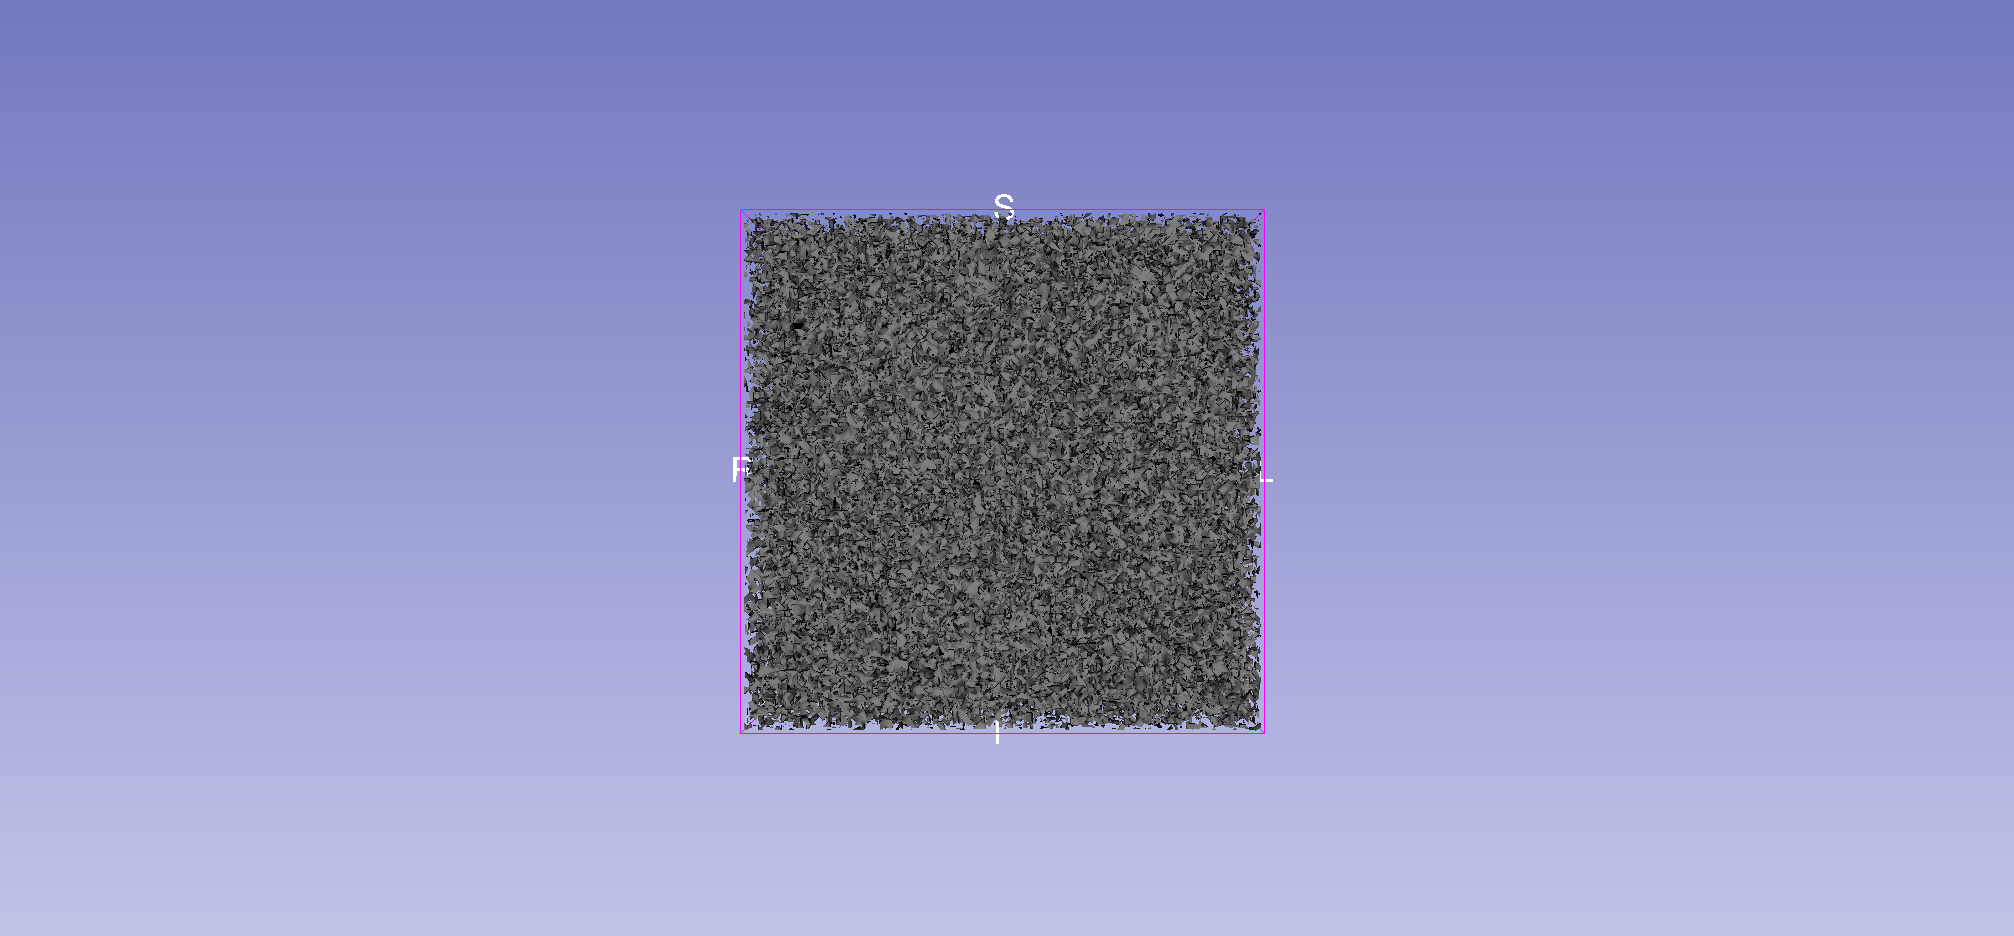

In [70]:
parameters = {}
parameters["InputVolume"] = scalar_node.GetID()
parameters["Threshold"] = 0.75
outModel = slicer.vtkMRMLModelNode()
slicer.mrmlScene.AddNode( outModel )
parameters["OutputGeometry"] = outModel.GetID()
grayMaker = slicer.modules.grayscalemodelmaker
slicer.cli.runSync(grayMaker, None, parameters)
slicer.app.layoutManager().setLayout(slicer.vtkMRMLLayoutNode.SlicerLayoutOneUp3DView)
slicer.app.layoutManager().threeDWidget(0).threeDView().resetCamera()
display()